<a href="https://colab.research.google.com/github/amandabetania/QUIZ-PCD/blob/main/Quiz_PCD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from google.colab.patches import cv2_imshow

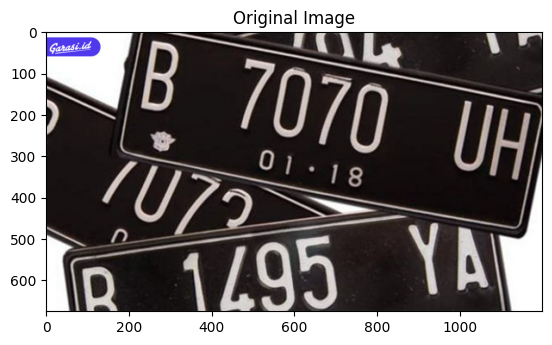

In [ ]:
# Baca dan Tampilkan Gambar
image = cv2.imread("/content/plat.jpeg")
rgb_image = Image.fromarray(image).convert('RGB')

plt.title('Original Image')
plt.imshow(rgb_image)

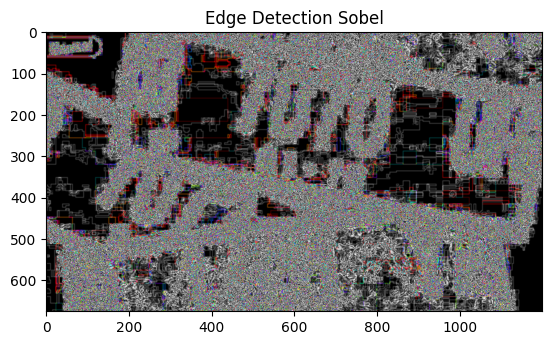

In [ ]:
# Edge Detection dengan Sobel
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5)
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5)
sobel_abs = np.absolute(sobel_x) + np.absolute(sobel_y)
sobel_edge = np.uint8(sobel_abs)

plt.title("Edge Detection Sobel")
plt.imshow(sobel_edge)

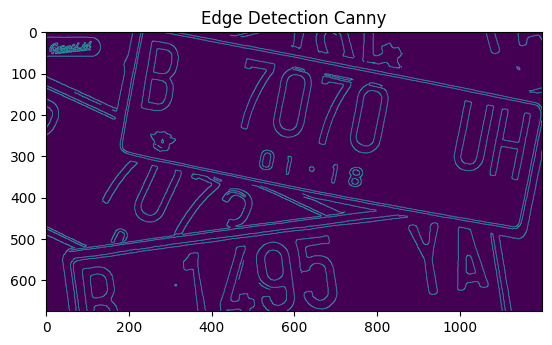

In [ ]:
# Edge Detection dengan Canny
canny_edge = cv2.Canny(image, 100, 200)

plt.title("Edge Detection Canny")
plt.imshow(canny_edge)

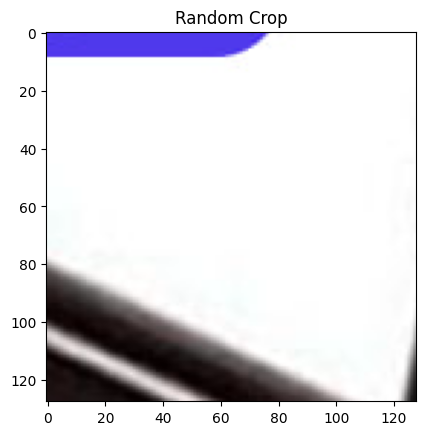

In [ ]:
# RANDOM CROP
x = 50
y = 50
crop_width, crop_height = 128, 128
crop = image[y:y+crop_height, x:x+crop_width]
plt.title("Random Crop")
plt.imshow(crop)

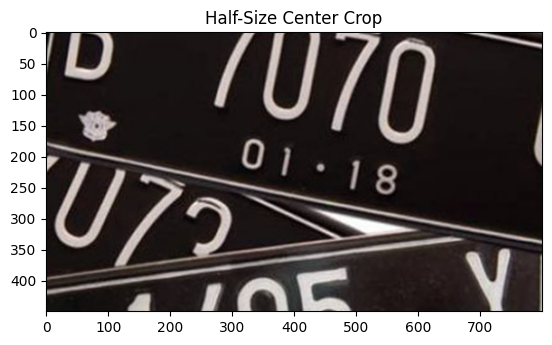

In [ ]:
# Half-Size Center Croping
half_height = image.shape[0]//3
half_width = image.shape[1]//3
center_x = image.shape[1]//2
center_y = image.shape[0]//2
center_crop_image = image[center_y - half_height: center_y + half_height,
                          center_x - half_width: center_x + half_width]

plt.title('Half-Size Center Crop')
plt.imshow(center_crop_image)

In [ ]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

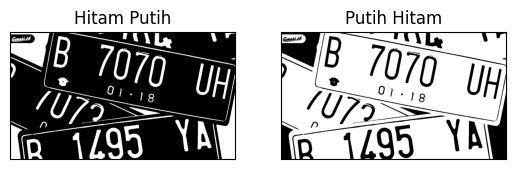

In [ ]:
# Transformasi Gambar
ret, thresh1 = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
ret, thresh2 = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)
title = ["Hitam Putih", "Putih Hitam"]
images = [thresh1, thresh2]

for i in range(2):
  plt.subplot(1, 2, i+1), plt.imshow(images[i], 'gray' ,vmin=0, vmax=255)
  plt.title(title[i])
  plt.xticks([]), plt.yticks([])
plt.show()

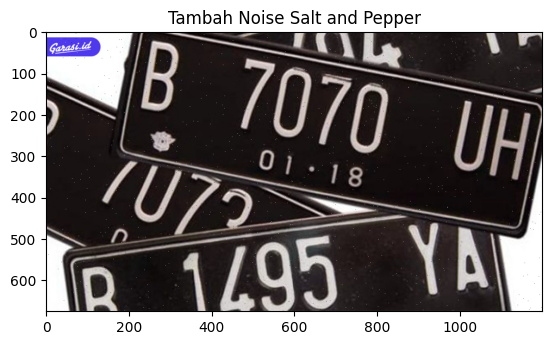

In [ ]:
# Tambah Noise Salt and Pepper
s_vs_p = 0.5
amount = 0.002
sp_image = image.copy()
for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        if np.random.rand() < amount:
            if np.random.rand() < s_vs_p:
                sp_image[i,j, :] = 255
            else:
                sp_image[i,j, :] = 0

plt.title('Tambah Noise Salt and Pepper')
plt.imshow(sp_image)

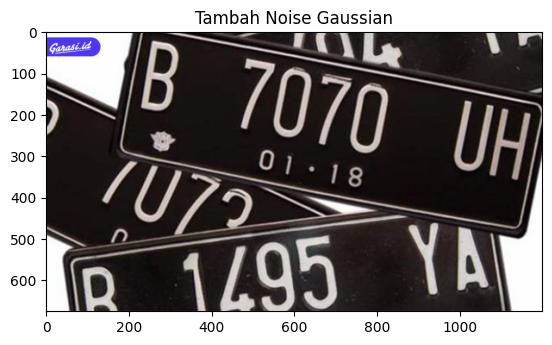

In [ ]:
# Tambah Noise Gaussian
mean = 0
variance = 0.01  # set the variance of the distribution
sigma = variance**0.5
gaussian_image = image.copy()
gaussian_noise = np.random.normal(mean, sigma, image.shape)
gaussian_image = gaussian_image + gaussian_noise
gaussian_image = np.clip(gaussian_image, 0, 255).astype('uint8')

plt.title('Tambah Noise Gaussian')
plt.imshow(gaussian_image)

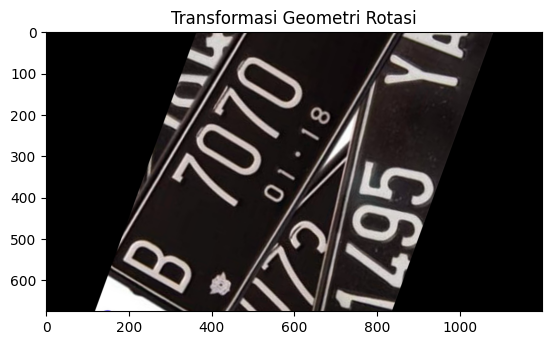

In [ ]:
# Transformasi Geometri Rotasi
(height, width) = image.shape[:2]
center = (width // 2, height // 2)
M = cv2.getRotationMatrix2D(center, 70, 1.0)
rotated = cv2.warpAffine(image, M, (width, height))

plt.title('Transformasi Geometri Rotasi')
plt.imshow(rotated)

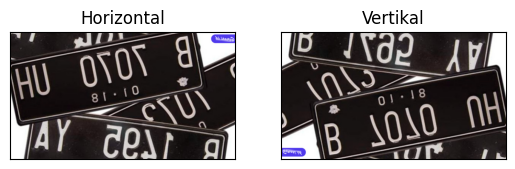

In [ ]:
# Transformasi Geometri Flip
horizontal = cv2.flip(image, 1)
vertikal = cv2.flip(image, 0)

title = ["Horizontal", "Vertikal"]
images = [horizontal, vertikal]

for i in range(2):
  plt.subplot(1, 2, i+1), plt.imshow(images[i], 'gray' ,vmin=0, vmax=255)
  plt.title(title[i])
  plt.xticks([]), plt.yticks([])
plt.show()